In [ ]:

!pip install matplotlib deap

# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [ ]:


num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [ ]:


# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals


In [ ]:



#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [ ]:

toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:

def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	584.363	4.39083
1  	238   	571.432	6.56085
2  	221   	557.005	6.56085
3  	219   	545.564	2.84347
4  	243   	546.47 	1.59726
5  	213   	540.795	0.170038
6  	206   	537.08 	6.52506 
7  	242   	531.47 	3.45364 
8  	248   	534.455	4.65571 
9  	229   	526.706	5.13533 
10 	234   	523.368	6.34355 
11 	232   	519.474	3.10305 
12 	241   	509.497	3.04143 
13 	235   	509.535	4.09817 
14 	230   	505.802	4.40513 
15 	233   	505.658	4.40513 
16 	231   	501.101	4.69367 
17 	221   	490.692	5.33182 
18 	215   	484.288	3.20319 
19 	244   	479.213	1.69384 
20 	227   	472.766	0.409601
21 	235   	457.787	0.409601
22 	246   	456.187	1.69384 
23 	231   	448.828	2.55718 
24 	249   	443.749	2.55718 
25 	220   	431.216	1.80634 
26 	235   	415.238	6.26034 
27 	226   	395.43 	2.34098 
28 	217   	377.108	3.33106 
29 	220   	368.51 	12.0823 
30 	222   	358.992	12.0823 


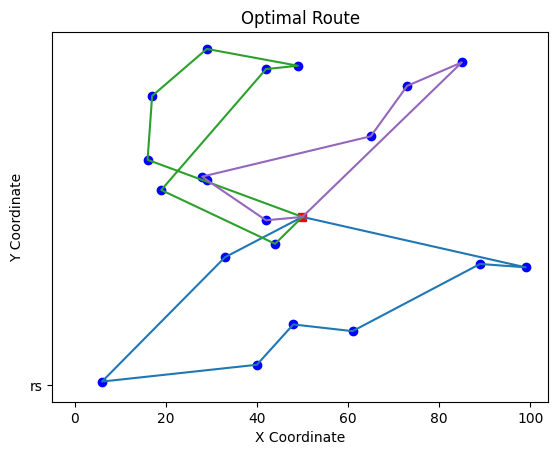

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(69)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html
    plot_routes(hof[0],"Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()